In [6]:
import torch
from torch import nn
import os
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
def walkdir(dir_path):
    for dirpath,dirnames,filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")
image_path = "../dataset/"
walkdir(image_path)

There are 2 directories and 0 files in ../dataset/
There are 1 directories and 0 files in ../dataset/test_set
There are 2 directories and 0 files in ../dataset/test_set\test_set
There are 0 directories and 1012 files in ../dataset/test_set\test_set\cats
There are 0 directories and 1013 files in ../dataset/test_set\test_set\dogs
There are 1 directories and 0 files in ../dataset/training_set
There are 2 directories and 0 files in ../dataset/training_set\training_set
There are 0 directories and 4001 files in ../dataset/training_set\training_set\cats
There are 0 directories and 4006 files in ../dataset/training_set\training_set\dogs


In [8]:
test_dir = "../dataset/test_set/test_set"
train_dir = "../dataset/training_set/training_set"
train_dir,test_dir

('../dataset/training_set/training_set', '../dataset/test_set/test_set')

In [9]:
import random
from PIL import Image
import glob
from pathlib import Path

random.seed(42)

Image path: ../dataset\test_set\test_set\dogs\dog.4805.jpg
Image class: dogs
image height: 499, image width: 375


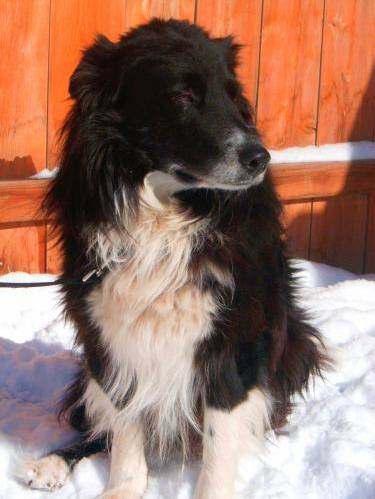

In [ ]:
"""This snippet of code is used to randomly select an image from the dataset.
The class (parent directory) label is stored in the image_class variable. 
The image is then displayed using the PIL library.
The height and width of the image are also displayed."""
image_path_list = glob.glob(f"{image_path}/*/*/*/*.jpg")
random_image_path = random.choice(image_path_list)
image_class = Path(random_image_path).parent.stem
img = Image.open(random_image_path)

print(f"Image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"image height: {img.height}, image width: {img.width}")
img

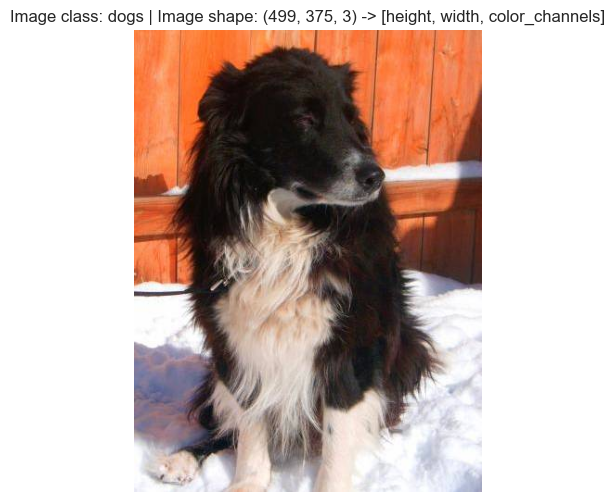

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
arrayfied_image =  np.array(img)
plt.figure(figsize=(8,6))
plt.imshow(arrayfied_image)
plt.title(f"Image class: {image_class} | Image shape: {arrayfied_image.shape} -> [height, width, color_channels]")
plt.axis(False);